In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
insurance_df=pd.read_csv("insurance1.csv")

In [3]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,northwest,10600.54830
1334,18,0,31.920,0,1,northeast,2205.98080
1335,18,0,36.850,0,1,southeast,1629.83350
1336,21,0,25.800,0,1,southwest,2007.94500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A04C8A8048>,
      dtype=object)

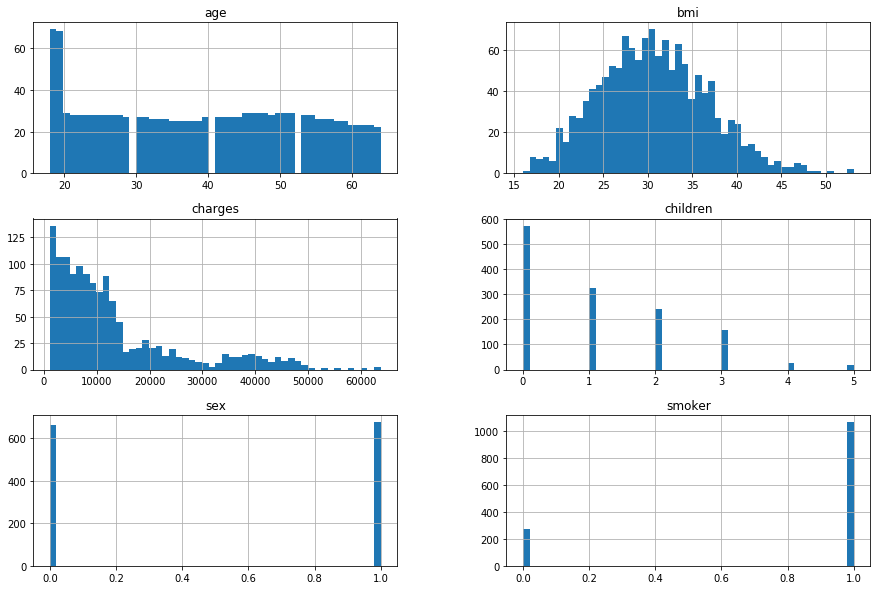

In [4]:
 insurance_df.hist(bins=50, figsize=[15,10])

In [5]:
X=insurance_df[["age","sex","bmi","children","smoker"]]
Y=insurance_df[["charges"]]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [7]:
model=keras.Sequential([
    keras.layers.Dense(150,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(1,activation="linear")
])
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               900       
_________________________________________________________________
dense_1 (Dense)              (None, 300)               45300     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 301       
Total params: 227,101
Trainable params: 227,101
Non-trainable params: 0
_________________________________________________________________


In [8]:
checkpt_cb=keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
early_cb=keras.callbacks.EarlyStopping(patience=250,restore_best_weights=True)
history=model.fit(X_train,y_train,validation_split=0.2,epochs=1000,callbacks=[checkpt_cb,early_cb])

Train on 856 samples, validate on 214 samples
Epoch 1/1000
856/856 [==============================] - 1s 2ms/sample - loss: 12848.0678 - mean_absolute_error: 12848.0674 - accuracy: 0.0000e+00 - val_loss: 9798.9550 - val_mean_absolute_error: 9798.9561 - val_accuracy: 0.0000e+00
Epoch 2/1000
856/856 [==============================] - 1s 931us/sample - loss: 8342.7153 - mean_absolute_error: 8342.7158 - accuracy: 0.0000e+00 - val_loss: 6859.5072 - val_mean_absolute_error: 6859.5078 - val_accuracy: 0.0000e+00
Epoch 3/1000
856/856 [==============================] - 1s 1ms/sample - loss: 7568.3726 - mean_absolute_error: 7568.3726 - accuracy: 0.0000e+00 - val_loss: 6529.1585 - val_mean_absolute_error: 6529.1582 - val_accuracy: 0.0000e+00
Epoch 4/1000
856/856 [==============================] - 1s 1ms/sample - loss: 7310.7557 - mean_absolute_error: 7310.7568 - accuracy: 0.0000e+00 - val_loss: 6325.3826 - val_mean_absolute_error: 6325.3833 - val_accuracy: 0.0000e+00
Epoch 5/1000
856/856 [========

856/856 [==============================] - 1s 821us/sample - loss: 3070.5272 - mean_absolute_error: 3070.5273 - accuracy: 0.0000e+00 - val_loss: 2225.3782 - val_mean_absolute_error: 2225.3782 - val_accuracy: 0.0000e+00
Epoch 36/1000
856/856 [==============================] - 1s 1ms/sample - loss: 2868.3845 - mean_absolute_error: 2868.3845 - accuracy: 0.0000e+00 - val_loss: 1787.7378 - val_mean_absolute_error: 1787.7375 - val_accuracy: 0.0000e+00
Epoch 37/1000
856/856 [==============================] - 1s 694us/sample - loss: 2915.0880 - mean_absolute_error: 2915.0879 - accuracy: 0.0000e+00 - val_loss: 1861.2571 - val_mean_absolute_error: 1861.2573 - val_accuracy: 0.0000e+00
Epoch 38/1000
856/856 [==============================] - 1s 657us/sample - loss: 3073.9292 - mean_absolute_error: 3073.9290 - accuracy: 0.0000e+00 - val_loss: 1970.6957 - val_mean_absolute_error: 1970.6957 - val_accuracy: 0.0000e+00
Epoch 39/1000
856/856 [==============================] - 1s 694us/sample - loss: 298

856/856 [==============================] - 0s 438us/sample - loss: 2471.3789 - mean_absolute_error: 2471.3792 - accuracy: 0.0000e+00 - val_loss: 1581.4260 - val_mean_absolute_error: 1581.4259 - val_accuracy: 0.0000e+00
Epoch 71/1000
856/856 [==============================] - 0s 292us/sample - loss: 2505.8862 - mean_absolute_error: 2505.8865 - accuracy: 0.0000e+00 - val_loss: 1613.2826 - val_mean_absolute_error: 1613.2826 - val_accuracy: 0.0000e+00
Epoch 72/1000
856/856 [==============================] - 1s 712us/sample - loss: 2461.0155 - mean_absolute_error: 2461.0154 - accuracy: 0.0000e+00 - val_loss: 1489.5819 - val_mean_absolute_error: 1489.5818 - val_accuracy: 0.0000e+00
Epoch 73/1000
856/856 [==============================] - 0s 438us/sample - loss: 2433.0640 - mean_absolute_error: 2433.0642 - accuracy: 0.0000e+00 - val_loss: 1583.8064 - val_mean_absolute_error: 1583.8065 - val_accuracy: 0.0000e+00
Epoch 74/1000
856/856 [==============================] - 0s 456us/sample - loss: 2

856/856 [==============================] - 0s 383us/sample - loss: 2707.7895 - mean_absolute_error: 2707.7893 - accuracy: 0.0000e+00 - val_loss: 1832.5770 - val_mean_absolute_error: 1832.5768 - val_accuracy: 0.0000e+00
Epoch 106/1000
856/856 [==============================] - 0s 310us/sample - loss: 2492.5836 - mean_absolute_error: 2492.5835 - accuracy: 0.0000e+00 - val_loss: 1506.8710 - val_mean_absolute_error: 1506.8710 - val_accuracy: 0.0000e+00
Epoch 107/1000
856/856 [==============================] - 0s 310us/sample - loss: 2543.4055 - mean_absolute_error: 2543.4053 - accuracy: 0.0000e+00 - val_loss: 1514.5457 - val_mean_absolute_error: 1514.5457 - val_accuracy: 0.0000e+00
Epoch 108/1000
856/856 [==============================] - 0s 292us/sample - loss: 2381.2764 - mean_absolute_error: 2381.2766 - accuracy: 0.0000e+00 - val_loss: 1605.4773 - val_mean_absolute_error: 1605.4774 - val_accuracy: 0.0000e+00
Epoch 109/1000
856/856 [==============================] - 0s 310us/sample - los

856/856 [==============================] - 1s 1ms/sample - loss: 2345.0746 - mean_absolute_error: 2345.0747 - accuracy: 0.0000e+00 - val_loss: 1422.5654 - val_mean_absolute_error: 1422.5653 - val_accuracy: 0.0000e+00
Epoch 141/1000
856/856 [==============================] - 1s 894us/sample - loss: 2364.6421 - mean_absolute_error: 2364.6421 - accuracy: 0.0000e+00 - val_loss: 1497.8153 - val_mean_absolute_error: 1497.8154 - val_accuracy: 0.0000e+00
Epoch 142/1000
856/856 [==============================] - 1s 839us/sample - loss: 2403.7343 - mean_absolute_error: 2403.7346 - accuracy: 0.0000e+00 - val_loss: 1569.2693 - val_mean_absolute_error: 1569.2694 - val_accuracy: 0.0000e+00
Epoch 143/1000
856/856 [==============================] - 1s 693us/sample - loss: 2411.9835 - mean_absolute_error: 2411.9834 - accuracy: 0.0000e+00 - val_loss: 1670.6054 - val_mean_absolute_error: 1670.6056 - val_accuracy: 0.0000e+00
Epoch 144/1000
856/856 [==============================] - 1s 657us/sample - loss:

856/856 [==============================] - 0s 237us/sample - loss: 2355.5290 - mean_absolute_error: 2355.5291 - accuracy: 0.0000e+00 - val_loss: 1525.0251 - val_mean_absolute_error: 1525.0250 - val_accuracy: 0.0000e+00
Epoch 176/1000
856/856 [==============================] - 0s 219us/sample - loss: 2370.2933 - mean_absolute_error: 2370.2935 - accuracy: 0.0000e+00 - val_loss: 1496.8340 - val_mean_absolute_error: 1496.8341 - val_accuracy: 0.0000e+00
Epoch 177/1000
856/856 [==============================] - 0s 219us/sample - loss: 2360.6104 - mean_absolute_error: 2360.6104 - accuracy: 0.0000e+00 - val_loss: 1549.0663 - val_mean_absolute_error: 1549.0663 - val_accuracy: 0.0000e+00
Epoch 178/1000
856/856 [==============================] - 0s 219us/sample - loss: 2390.6402 - mean_absolute_error: 2390.6401 - accuracy: 0.0000e+00 - val_loss: 1610.6782 - val_mean_absolute_error: 1610.6783 - val_accuracy: 0.0000e+00
Epoch 179/1000
856/856 [==============================] - 0s 201us/sample - los

856/856 [==============================] - 0s 292us/sample - loss: 2426.5575 - mean_absolute_error: 2426.5576 - accuracy: 0.0000e+00 - val_loss: 1431.0404 - val_mean_absolute_error: 1431.0406 - val_accuracy: 0.0000e+00
Epoch 211/1000
856/856 [==============================] - 0s 274us/sample - loss: 2514.8456 - mean_absolute_error: 2514.8457 - accuracy: 0.0000e+00 - val_loss: 1672.5959 - val_mean_absolute_error: 1672.5958 - val_accuracy: 0.0000e+00
Epoch 212/1000
856/856 [==============================] - 0s 274us/sample - loss: 2382.3791 - mean_absolute_error: 2382.3789 - accuracy: 0.0000e+00 - val_loss: 1458.4282 - val_mean_absolute_error: 1458.4281 - val_accuracy: 0.0000e+00
Epoch 213/1000
856/856 [==============================] - 0s 292us/sample - loss: 2328.3032 - mean_absolute_error: 2328.3032 - accuracy: 0.0000e+00 - val_loss: 1486.9349 - val_mean_absolute_error: 1486.9351 - val_accuracy: 0.0000e+00
Epoch 214/1000
856/856 [==============================] - 0s 292us/sample - los

856/856 [==============================] - 0s 255us/sample - loss: 2548.2251 - mean_absolute_error: 2548.2256 - accuracy: 0.0000e+00 - val_loss: 1645.5396 - val_mean_absolute_error: 1645.5396 - val_accuracy: 0.0000e+00
Epoch 246/1000
856/856 [==============================] - 0s 237us/sample - loss: 2579.7998 - mean_absolute_error: 2579.8003 - accuracy: 0.0000e+00 - val_loss: 2023.8004 - val_mean_absolute_error: 2023.8004 - val_accuracy: 0.0000e+00
Epoch 247/1000
856/856 [==============================] - 0s 219us/sample - loss: 2463.3009 - mean_absolute_error: 2463.3008 - accuracy: 0.0000e+00 - val_loss: 1628.4174 - val_mean_absolute_error: 1628.4174 - val_accuracy: 0.0000e+00
Epoch 248/1000
856/856 [==============================] - 0s 237us/sample - loss: 2314.0804 - mean_absolute_error: 2314.0806 - accuracy: 0.0000e+00 - val_loss: 1485.6391 - val_mean_absolute_error: 1485.6390 - val_accuracy: 0.0000e+00
Epoch 249/1000
856/856 [==============================] - 0s 255us/sample - los

856/856 [==============================] - 0s 274us/sample - loss: 2293.2602 - mean_absolute_error: 2293.2603 - accuracy: 0.0000e+00 - val_loss: 1525.5746 - val_mean_absolute_error: 1525.5745 - val_accuracy: 0.0000e+00
Epoch 281/1000
856/856 [==============================] - 0s 237us/sample - loss: 2284.1141 - mean_absolute_error: 2284.1143 - accuracy: 0.0000e+00 - val_loss: 1555.1530 - val_mean_absolute_error: 1555.1531 - val_accuracy: 0.0000e+00
Epoch 282/1000
856/856 [==============================] - 0s 219us/sample - loss: 2383.7918 - mean_absolute_error: 2383.7920 - accuracy: 0.0000e+00 - val_loss: 1683.3145 - val_mean_absolute_error: 1683.3146 - val_accuracy: 0.0000e+00
Epoch 283/1000
856/856 [==============================] - 0s 237us/sample - loss: 2327.0972 - mean_absolute_error: 2327.0972 - accuracy: 0.0000e+00 - val_loss: 1480.2594 - val_mean_absolute_error: 1480.2594 - val_accuracy: 0.0000e+00
Epoch 284/1000
856/856 [==============================] - 0s 237us/sample - los

856/856 [==============================] - 0s 237us/sample - loss: 2276.4524 - mean_absolute_error: 2276.4521 - accuracy: 0.0000e+00 - val_loss: 1522.4922 - val_mean_absolute_error: 1522.4923 - val_accuracy: 0.0000e+00
Epoch 316/1000
856/856 [==============================] - 0s 219us/sample - loss: 2295.5260 - mean_absolute_error: 2295.5259 - accuracy: 0.0000e+00 - val_loss: 1689.9056 - val_mean_absolute_error: 1689.9056 - val_accuracy: 0.0000e+00
Epoch 317/1000
856/856 [==============================] - 0s 219us/sample - loss: 2319.4308 - mean_absolute_error: 2319.4309 - accuracy: 0.0000e+00 - val_loss: 1505.7893 - val_mean_absolute_error: 1505.7893 - val_accuracy: 0.0000e+00
Epoch 318/1000
856/856 [==============================] - 0s 219us/sample - loss: 2391.7053 - mean_absolute_error: 2391.7056 - accuracy: 0.0000e+00 - val_loss: 1508.1465 - val_mean_absolute_error: 1508.1466 - val_accuracy: 0.0000e+00
Epoch 319/1000
856/856 [==============================] - 0s 219us/sample - los

856/856 [==============================] - 0s 219us/sample - loss: 2348.0319 - mean_absolute_error: 2348.0317 - accuracy: 0.0000e+00 - val_loss: 1516.3729 - val_mean_absolute_error: 1516.3729 - val_accuracy: 0.0000e+00
Epoch 351/1000
856/856 [==============================] - 0s 219us/sample - loss: 2281.9987 - mean_absolute_error: 2281.9988 - accuracy: 0.0000e+00 - val_loss: 1532.7077 - val_mean_absolute_error: 1532.7076 - val_accuracy: 0.0000e+00
Epoch 352/1000
856/856 [==============================] - 0s 219us/sample - loss: 2344.3836 - mean_absolute_error: 2344.3835 - accuracy: 0.0000e+00 - val_loss: 1951.3753 - val_mean_absolute_error: 1951.3755 - val_accuracy: 0.0000e+00
Epoch 353/1000
856/856 [==============================] - 0s 219us/sample - loss: 2354.4735 - mean_absolute_error: 2354.4736 - accuracy: 0.0000e+00 - val_loss: 1535.9950 - val_mean_absolute_error: 1535.9950 - val_accuracy: 0.0000e+00
Epoch 354/1000
856/856 [==============================] - 0s 237us/sample - los

Epoch 385/1000
856/856 [==============================] - 0s 237us/sample - loss: 2263.0843 - mean_absolute_error: 2263.0842 - accuracy: 0.0000e+00 - val_loss: 1657.6922 - val_mean_absolute_error: 1657.6921 - val_accuracy: 0.0000e+00
Epoch 386/1000
856/856 [==============================] - 0s 201us/sample - loss: 2248.3413 - mean_absolute_error: 2248.3416 - accuracy: 0.0000e+00 - val_loss: 1524.9086 - val_mean_absolute_error: 1524.9086 - val_accuracy: 0.0000e+00
Epoch 387/1000
856/856 [==============================] - 0s 201us/sample - loss: 2269.0313 - mean_absolute_error: 2269.0312 - accuracy: 0.0000e+00 - val_loss: 1613.4380 - val_mean_absolute_error: 1613.4381 - val_accuracy: 0.0000e+00
Epoch 388/1000
856/856 [==============================] - 0s 201us/sample - loss: 2297.5561 - mean_absolute_error: 2297.5562 - accuracy: 0.0000e+00 - val_loss: 1464.6888 - val_mean_absolute_error: 1464.6890 - val_accuracy: 0.0000e+00
Epoch 389/1000
856/856 [==============================] - 0s 201

Epoch 420/1000
856/856 [==============================] - 0s 201us/sample - loss: 2253.0940 - mean_absolute_error: 2253.0940 - accuracy: 0.0000e+00 - val_loss: 1562.1335 - val_mean_absolute_error: 1562.1337 - val_accuracy: 0.0000e+00
Epoch 421/1000
856/856 [==============================] - 0s 182us/sample - loss: 2244.7233 - mean_absolute_error: 2244.7234 - accuracy: 0.0000e+00 - val_loss: 1494.8818 - val_mean_absolute_error: 1494.8818 - val_accuracy: 0.0000e+00
Epoch 422/1000
856/856 [==============================] - 0s 182us/sample - loss: 2242.5834 - mean_absolute_error: 2242.5833 - accuracy: 0.0000e+00 - val_loss: 1522.6996 - val_mean_absolute_error: 1522.6996 - val_accuracy: 0.0000e+00
Epoch 423/1000
856/856 [==============================] - 0s 219us/sample - loss: 2290.9299 - mean_absolute_error: 2290.9302 - accuracy: 0.0000e+00 - val_loss: 1651.7682 - val_mean_absolute_error: 1651.7683 - val_accuracy: 0.0000e+00
Epoch 424/1000
856/856 [==============================] - 0s 201

In [9]:
model.evaluate(X_test,y_test)

268/268 [==============================] - 0s 643us/sample - loss: 2040.4448 - mean_absolute_error: 2040.4447 - accuracy: 0.0000e+00


[2040.4448278626398, 2040.4447, 0.0]

In [10]:
model.predict(X_test[:5])

array([[13299.294 ],
       [10181.53  ],
       [ 1851.0142],
       [ 1569.9856],
       [13058.302 ]], dtype=float32)

In [11]:
y_test[:5]

,charges
366,13430.26500
1264,10370.91255
391,2138.07070
681,1242.26000
676,12485.80090


In [12]:
x=[[33,1,22.7,0,1]]

In [13]:
model.predict(x)

array([[4202.257]], dtype=float32)

In [14]:
x=[[18,0,31.92,0,1]]
model.predict(x)

array([[1936.2938]], dtype=float32)

In [15]:
model.save("insurance_final.h5")